In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score

In [38]:
X,y = make_moons(n_samples = 1000,noise=0.4 , random_state = 42)

X.shape, y.shape

((1000, 2), (1000,))

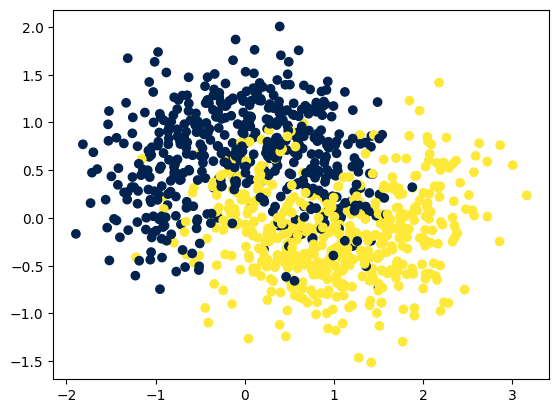

In [39]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='cividis')

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [41]:
params = {
    'max_leaf_nodes': list(range(2,50)),
    'max_depth':list(range(2,10)),
    'min_samples_split':[2,3,4]
}

cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                 params,
                 cv=3)

cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [42]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4, random_state=42)

In [43]:
y_pred = cv.predict(X_test)
accuracy_score(y_test,y_pred)

0.855

# Lets grow a forest

In [50]:
from sklearn.model_selection import ShuffleSplit
from sklearn.base import clone
from scipy.stats import mode

In [46]:
n_trees = 1000
n_instances = 100

subsets = []

rs = ShuffleSplit(n_splits = n_trees,
                  test_size=len(X_train)-n_instances,
                  random_state=42)

for sub_train_idx ,sub_test_idx in rs.split(X_train):
    subx = X_train[sub_train_idx]
    suby = y_train[sub_train_idx]
    subsets.append((subx,suby))

In [49]:
forest = [clone(cv.best_estimator_) for _ in range(n_trees)]
# creating 1000 trees of the same kind

accuracy_scores = []

for tree , (subx,suby) in zip(forest,subsets):
    tree.fit(subx,suby)
    accuracy_scores.append(accuracy_score(y_test,tree.predict(X_test)))


np.mean(accuracy_scores)

0.814735

In [51]:
Y_pred = np.empty([n_trees,len(X_test)],dtype = np.uint8)

for tree_idx,tree in enumerate(forest):
    Y_pred[tree_idx] = tree.predict(X_test)

y_majority ,n_votes = mode(Y_pred,axis=0)

accuracy_score(y_test,y_majority.reshape([-1]))
    

0.85